In [1]:
## Visualize each of the two steps and selection 

In [1]:
import numpy as np
from astropy.io import fits
from marvin.tools import Maps
from tqdm import tqdm
import Bicone_Classifier
import multiprocessing as mp
import copy

from scipy.fft import fft
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from marvin.utils.general.images import showImage
from marvin.tools.image import Image

from scipy import ndimage

[INFO]: No release version set. Setting default to DR17
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /Users/runquanguan/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: Passing field metadata as keyword arguments is deprecated. Use the explicit `metadata=...` argument instead. Additional metadata: {'location': 'view_args'} (RemovedInMarshmallow4Warning)
[WARNING]: The 'missing' argument to fields is deprecated. Use 'load_default' instead. (RemovedInMarshmallow4Warning)


# Visualizing the Rings

### plot over image

In [2]:
np.linspace(0.6,2,8)

array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [3]:
def plot_ring_over_image(data):
    
    HEADER_PATH = '/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits'
    hdul = fits.open(HEADER_PATH)
    hdu = hdul[1].data
    plateifu = hdu['PLATEIFU']
    petro_angle = hdu['NSA_ELPETRO_PHI']
    sersic_angle = hdu['NSA_SERSIC_PHI']

    dapall_index = list(plateifu).index(data)
    p_slope = np.tan(petro_angle[dapall_index])
    s_slope = np.tan(sersic_angle[dapall_index])

    maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
    #st_vel = maps.stellar_vel
    #oiii_ew = maps.emline_gew_oiii_5008
    phi = maps.spx_ellcoo_elliptical_azimuth.value
    r_re = maps.spx_ellcoo_r_re.value

    axis_indicat = np.zeros(phi.shape)

    for i in range(phi.shape[0]):
        for j in range(phi.shape[1]):
            if phi[i][j] >= 88 and phi[i][j] <= 92:
                axis_indicat[i][j] = 10
            elif phi[i][j] >= 268 and phi[i][j] <= 272:
                axis_indicat[i][j] = 10
            elif r_re[i][j] > 0.6 and r_re[i][j] < 0.8:
                axis_indicat[i][j] = 20
            elif r_re[i][j] > 0.8 and r_re[i][j] < 0.9:
                axis_indicat[i][j] = 30
            elif r_re[i][j] > 0.9 and r_re[i][j] < 1.0:
                axis_indicat[i][j] = 40
            elif r_re[i][j] > 1.0 and r_re[i][j] < 1.1:
                axis_indicat[i][j] = 50
            elif r_re[i][j] > 1.1 and r_re[i][j] < 1.2:
                axis_indicat[i][j] = 60
            elif r_re[i][j] > 1.2 and r_re[i][j] < 1.3:
                axis_indicat[i][j] = 70
            elif r_re[i][j] > 1.3 and r_re[i][j] < 1.4:
                axis_indicat[i][j] = 80
            elif r_re[i][j] > 1.4 and r_re[i][j] < 1.5:
                axis_indicat[i][j] = 90
            elif r_re[i][j] > 1.5 and r_re[i][j] < 1.6:
                axis_indicat[i][j] = 100
            elif r_re[i][j] > 1.6 and r_re[i][j] < 1.7:
                axis_indicat[i][j] = 110
            elif r_re[i][j] > 1.7 and r_re[i][j] < 1.8:
                axis_indicat[i][j] = 120
            elif r_re[i][j] > 1.8 and r_re[i][j] < 1.9:
                axis_indicat[i][j] = 130
            elif r_re[i][j] > 1.9 and r_re[i][j] < 2.0:
                axis_indicat[i][j] = 140
            elif r_re[i][j] > 2.0 and r_re[i][j] < 2.1:
                axis_indicat[i][j] = 150
            elif r_re[i][j] > 2.1 and r_re[i][j] < 2.2:
                axis_indicat[i][j] = 160
            elif r_re[i][j] > 2.2 and r_re[i][j] < 2.3:
                axis_indicat[i][j] = 170
            else:
                pass
            
    im = Image(data)

    spaxel_len = 281*2
    factor = spaxel_len / axis_indicat.shape[0]

    large_mask = ndimage.zoom(axis_indicat, factor, order=0)
    # large_mask[large_mask > 0] = 1


    mask = np.flipud(large_mask)
    im = showImage(plateifu = data)
    masked = np.ma.masked_where(mask == 0, mask)

    plt.imshow(im, interpolation='none')
    plt.imshow(masked, 'hsv', interpolation='none', alpha=0.5)
    plt.title(data)
    plt.savefig(data+'_vis_image.png')

data = '8252-9101'
plot_ring_over_image(data)


### plot over OIII

In [34]:
def plot_ring_over_oiii(data):
    
    HEADER_PATH = '/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits'
    hdul = fits.open(HEADER_PATH)
    hdu = hdul[1].data
    plateifu = hdu['PLATEIFU']
    petro_angle = hdu['NSA_ELPETRO_PHI']
    sersic_angle = hdu['NSA_SERSIC_PHI']
    
    dapall_index = list(plateifu).index(data)
    p_slope = np.tan(petro_angle[dapall_index])
    s_slope = np.tan(sersic_angle[dapall_index])

    maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
    #st_vel = maps.stellar_vel
    oiii_ew = maps.emline_gew_oiii_5008.value
    phi = maps.spx_ellcoo_elliptical_azimuth.value
    r_re = maps.spx_ellcoo_r_re.value
    
    mean = np.mean(oiii_ew)
    sd = np.std(oiii_ew)
    
    for i in range(oiii_ew.shape[0]):
        for j in range(oiii_ew.shape[1]):
            if oiii_ew[i][j] >= mean+2*sd or oiii_ew[i][j]<=mean-2*sd:
                oiii_ew[i][j] = np.nan
            elif oiii_ew[i][j] == 0:
                oiii_ew[i][j] = np.nan
            else:
                pass

    axis_indicat = np.zeros(phi.shape)

    for i in range(phi.shape[0]):
        for j in range(phi.shape[1]):
            if phi[i][j] >= 88 and phi[i][j] <= 92:
                axis_indicat[i][j] = 10
            elif phi[i][j] >= 268 and phi[i][j] <= 272:
                axis_indicat[i][j] = 10
            elif r_re[i][j] > 0.6 and r_re[i][j] < 0.8:
                axis_indicat[i][j] = 20
            elif r_re[i][j] > 0.8 and r_re[i][j] < 0.9:
                axis_indicat[i][j] = 30
            elif r_re[i][j] > 0.9 and r_re[i][j] < 1.0:
                axis_indicat[i][j] = 40
            elif r_re[i][j] > 1.0 and r_re[i][j] < 1.1:
                axis_indicat[i][j] = 50
            elif r_re[i][j] > 1.1 and r_re[i][j] < 1.2:
                axis_indicat[i][j] = 60
            elif r_re[i][j] > 1.2 and r_re[i][j] < 1.3:
                axis_indicat[i][j] = 70
            elif r_re[i][j] > 1.3 and r_re[i][j] < 1.4:
                axis_indicat[i][j] = 80
            elif r_re[i][j] > 1.4 and r_re[i][j] < 1.5:
                axis_indicat[i][j] = 90
            elif r_re[i][j] > 1.5 and r_re[i][j] < 1.6:
                axis_indicat[i][j] = 100
            elif r_re[i][j] > 1.6 and r_re[i][j] < 1.7:
                axis_indicat[i][j] = 110
            elif r_re[i][j] > 1.7 and r_re[i][j] < 1.8:
                axis_indicat[i][j] = 120
            elif r_re[i][j] > 1.8 and r_re[i][j] < 1.9:
                axis_indicat[i][j] = 130
            elif r_re[i][j] > 1.9 and r_re[i][j] < 2.0:
                axis_indicat[i][j] = 140
            elif r_re[i][j] > 2.0 and r_re[i][j] < 2.1:
                axis_indicat[i][j] = 150
            elif r_re[i][j] > 2.1 and r_re[i][j] < 2.2:
                axis_indicat[i][j] = 160
            elif r_re[i][j] > 2.2 and r_re[i][j] < 2.3:
                axis_indicat[i][j] = 170
            else:
                axis_indicat[i][j] = np.nan





    plt.imshow(oiii_ew, 'viridis')
    plt.imshow(axis_indicat, 'hsv', interpolation='none', alpha=0.2)
    plt.title(data)
    plt.savefig(data+'_vis_oiii.png')

In [35]:
data = '8252-9101'

plot_ring_over_oiii(data)

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits' mode='rb' closefd=True> (ResourceWarning)


## Visualizing the Curves and FTT

In [18]:
def plot_curve(data):
    ellip = Bicone_Classifier.ellip_gen(data)
    color = cm.rainbow(np.linspace(0, 1, 8))
    for i,c in zip(np.linspace(0.6, 2, 8), color):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        plt.plot(curve, c = c)
      
    plt.title(data)
    plt.savefig(data+'_vis_curve.png')
                   
def plot_fft(data):
    ellip = Bicone_Classifier.ellip_gen(data)
    color = cm.rainbow(np.linspace(0, 1, 8))
    for i,c in zip(np.linspace(0.6, 2, 8), color):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        result = abs(fft(curve))   
        x = np.linspace(0.5, 15, 29)
        plt.plot(x, result[1:30], c = c)
    
    plt.title(data)
    plt.show()
    #plt.savefig(data+'_vis_ftt.png')

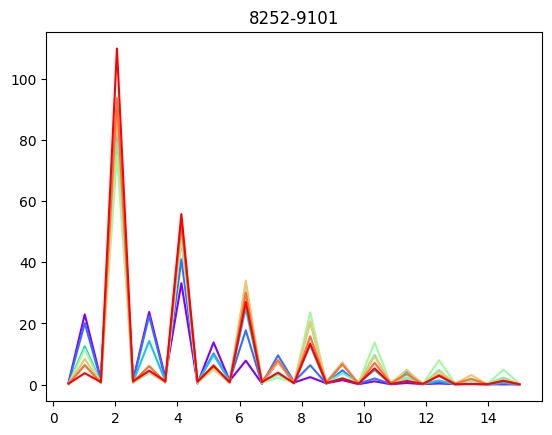

In [19]:
data = '8252-9101'
plot_fft(data)

## Scale up to the 157 galaxies

In [6]:
def plot_everything(data, inner = 0.6, outer = 2, step = 0.2):
    
    fig = plt.figure(figsize=(10, 7))
    
    
    '''
    HEADER_PATH = '/Users/runquanguan/Documents/dapall-v3_1_1-3.1.0.fits'
    hdul = fits.open(HEADER_PATH)
    hdu = hdul[1].data
    plateifu = hdu['PLATEIFU']
    petro_angle = hdu['NSA_ELPETRO_PHI']
    sersic_angle = hdu['NSA_SERSIC_PHI']

    dapall_index = list(plateifu).index(data)
    p_slope = np.tan(petro_angle[dapall_index])
    s_slope = np.tan(sersic_angle[dapall_index])
    '''

    maps = Maps(data, bintype='SPX', template='MILESHC-MASTARSSP')
    st_vel = maps.stellar_vel.value
    oiii_ew = maps.emline_gew_oiii_5008.value
    phi = maps.spx_ellcoo_elliptical_azimuth.value
    r_re = maps.spx_ellcoo_r_re.value
    
    mean = np.mean(oiii_ew)
    sd = np.std(oiii_ew)
    
    for i in range(oiii_ew.shape[0]):
        for j in range(oiii_ew.shape[1]):
            if oiii_ew[i][j] >= mean+2*sd or oiii_ew[i][j]<=mean-2*sd:
                oiii_ew[i][j] = np.nan
            elif oiii_ew[i][j] == 0:
                oiii_ew[i][j] = np.nan
            else:
                pass

    axis_indicat = np.zeros(phi.shape)

    for i in range(phi.shape[0]):
        for j in range(phi.shape[1]):
            if phi[i][j] >= 88 and phi[i][j] <= 92:
                axis_indicat[i][j] = 10
            elif phi[i][j] >= 268 and phi[i][j] <= 272:
                axis_indicat[i][j] = 10
            else:
                axis_indicat[i][j] = np.nan
                
    for k in np.arange(inner, outer, step):
        for i in range(phi.shape[0]):
            for j in range(phi.shape[1]):
                if r_re[i][j] > k and r_re[i][j] < k+step:
                    axis_indicat[i][j] = 100*k
                else:
                    pass

                
    rows = 2
    columns = 2
    
    # Plot the 1st image
    fig.add_subplot(rows, columns, 1)
    plt.title("Image")
    im = Image(data)
    spaxel_len = 281*2
    factor = spaxel_len / axis_indicat.shape[0]
    large_mask = ndimage.zoom(axis_indicat, factor, order=0)
    # large_mask[large_mask > 0] = 1
    mask = np.flipud(large_mask)
    im = showImage(plateifu = data)
    masked = np.ma.masked_where(mask == 0, mask)
    plt.imshow(im, interpolation='none')
    plt.imshow(masked, cmap = 'hsv', interpolation='none', alpha=0.3)

    # Plot the 2nd image 
    fig.add_subplot(rows, columns, 2)
    plt.title("OIII Flux Map")
    plt.imshow(oiii_ew, cmap = 'viridis')
    plt.imshow(axis_indicat, cmap = 'hsv', interpolation='none', alpha=0.3)

    
    ellip = Bicone_Classifier.ellip_gen(data)
    color = cm.hsv(np.linspace(0, 1, 8))
    
    # Plot 3rd image
    fig.add_subplot(rows, columns, 3)
    plt.title("OIII Flux dR")
    for i,c in zip(np.linspace(0.6, 2, 8), color):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        plt.plot(curve, c = c, alpha=0.5)

        
    # Plot 4th image
    fig.add_subplot(rows, columns, 4)
    plt.title("Fourier Frequency")
    for i,c in zip(np.linspace(0.6, 2, 8), color):
        start, end = round(i,1), round(i,1)+0.3
        curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2)
        result = abs(fft(curve))   
        x = np.linspace(0.5, 15, 29)
        plt.plot(x, result[1:30], c = c, alpha=0.5)


    
    
    plt.show()
    



[WARNING]: subprocess 26818 is still running (ResourceWarning)


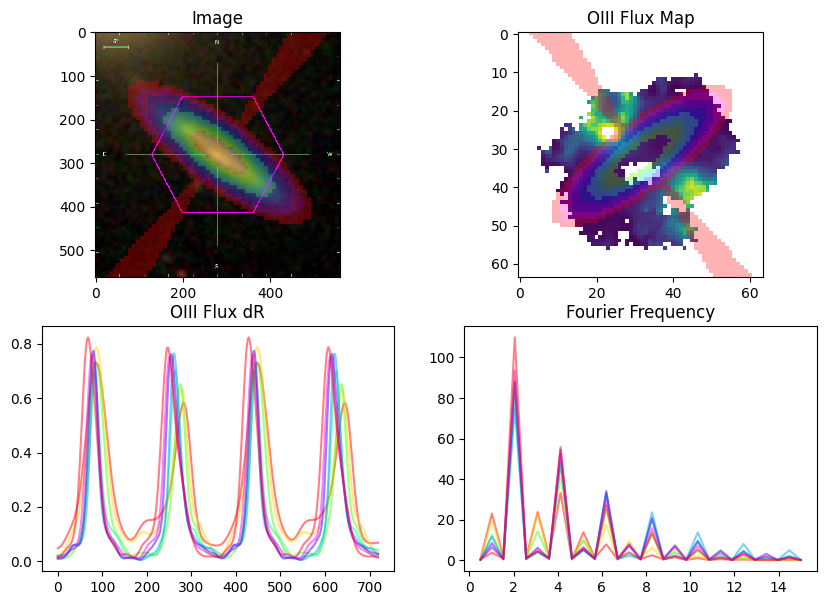

In [7]:
data = '8252-9101'

plot_everything(data)

## Scale up

SAMPLE_PATH = '/Users/runquanguan/Documents/v2_not_training.fits'
hdul_2 = fits.open(SAMPLE_PATH)
hdu_2 = hdul_2[1].data
plateifu_2 = hdu_2['plateifu']


for i in plateifu_2:
    if len(i) >= 2:
        print(i)
        plot_everything(i)
    else:
        pass
